In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# %%timeit
# 
# sim = Simulator(num_agents=66, sim_time=60000, lam=1e-4, mean=1e7, r=.05, shock_var=1e6)
# sim.run()

In [11]:
%%time
surpluses = []

for _ in tqdm(range(1)):

    sim = ShockSimulator(
               num_background_agents=66,
               num_trend_agents=486,
               sim_time=10000,
               num_assets = 1,
               lam = 2e-3,  
               lam_trend = 5e-3,
               mean = 1e9,
               r = 0,
               shock_var = 1e3,
               q_max = 10,
               pv_var = 1e6,
               shade=[1000, 1500],
               obs_var = 1e6,
               eta = 1,
               observe_transactions=False,
               strategic_variance=1e6,
               shock_entry_time = 5000,
               shock_interval = 500,
               shock_volume = 500,
               shock_side = SELL,
               L = 5,
               PI = 50,
               texp = 50,
               random_seed = 1,
               )


    data = sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)
print(surpluses)


  0%|          | 0/1 [00:00<?, ?it/s]

tensor(102018.8047)
[tensor(4080.7522)]
CPU times: user 8.18 s, sys: 950 ms, total: 9.13 s
Wall time: 5.52 s


In [12]:
std_dev = np.std(surpluses)
print("Standard Deviation:", std_dev)
print(surpluses)

Standard Deviation: 0.0
[tensor(4080.7522)]


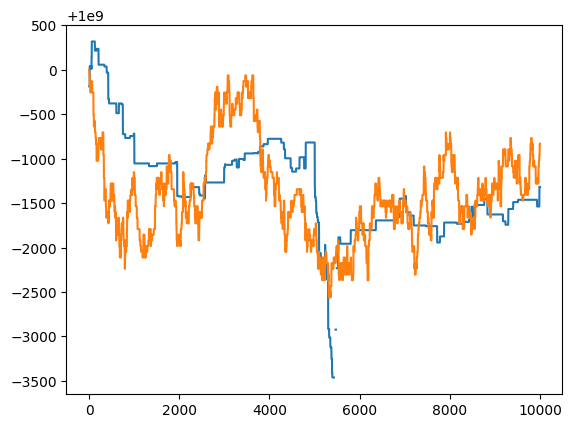

In [10]:
X, Yb, Ya, f = data

price = []

for i in range(len(Yb)):
    price.append((Ya[i] + Yb[i]) / 2)

# plt.plot(X, Ya)
# plt.plot(X, Yb)
plt.plot(X, price)
plt.plot(X, f)
plt.show()

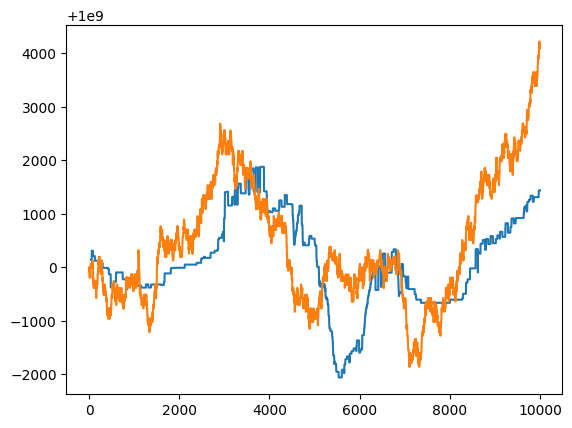

In [13]:
X, Yb, Ya, f = data

price = []

for i in range(len(Yb)):
    price.append((Ya[i] + Yb[i]) / 2)

# plt.plot(X, Ya)
# plt.plot(X, Yb)
plt.plot(X, price)
plt.plot(X, f)
plt.show()

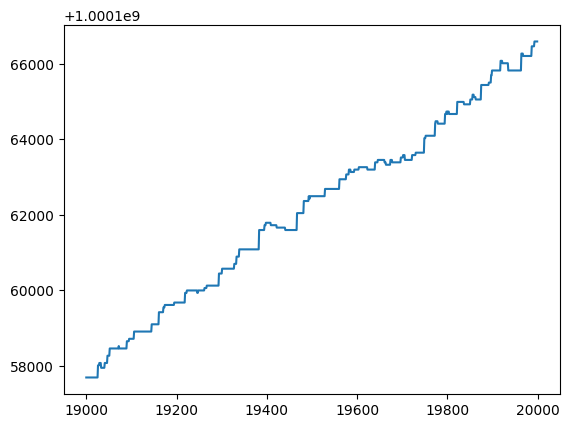

[1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000157696.0, 1000158016.0, 1000158016.0, 1000158016.0, 1000158080.0, 1000158080.0, 1000158080.0, 1000158080.0, 1000157952.0, 1000157952.0, 1000157952.0, 1000157952.0, 1000157952.0, 1000157952.0, 1000157952.0, 1000157952.0, 1000158080.0, 1000158080.0, 1000158080.0, 1000158080.0, 1000158080.0, 1000158080.0, 1000158272.0, 1000158272.0, 1000158272.0, 1000158272.0, 1000158272.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 1000158464.0, 10001

In [47]:
plt.plot(X[-1000:], f[-1000:])
plt.show()
print(f[-1000:])

In [44]:
f

[1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 1000000000.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 999999936.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000256.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 1000000192.0,
 100000019

In [5]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=24000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=1e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(14329.7041)
CPU times: user 47min 11s, sys: 12min, total: 59min 12s
Wall time: 8min 3s


In [6]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=1000, 
                                  lam=5e-3, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e5, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(10839.7383)
CPU times: user 14min 45s, sys: 3min 31s, total: 18min 16s
Wall time: 2min 25s


98720.796875


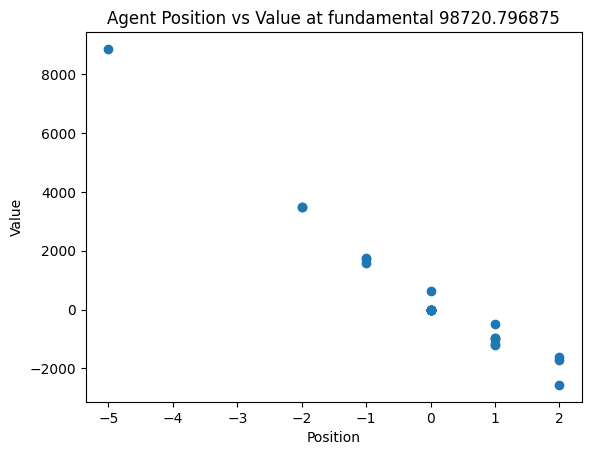

In [7]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


97220.203125


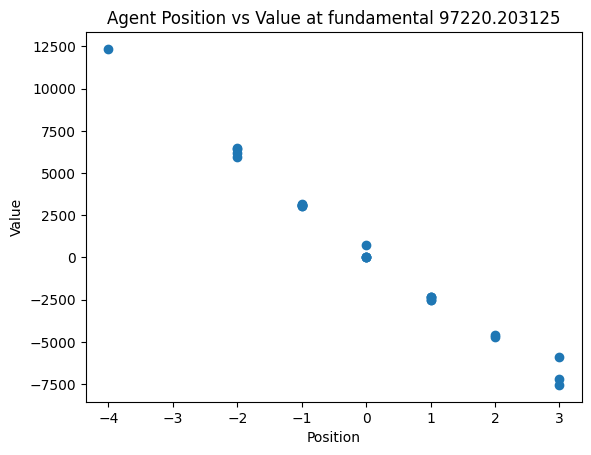

In [8]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


103123.8125


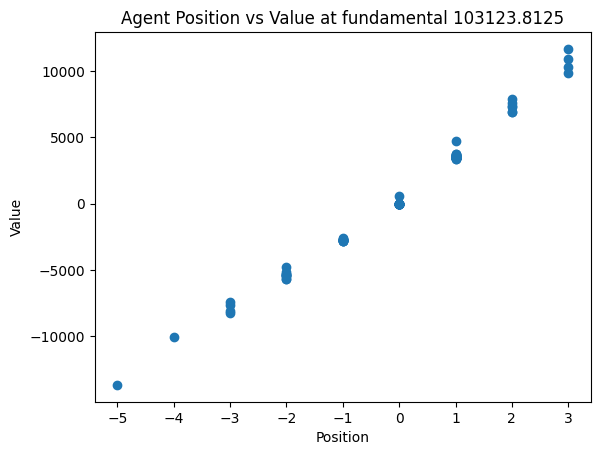

In [9]:
sim = SimulatorSampledArrival(num_background_agents=100, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()
